# Project Phase 3: California Median Housing Model

#### Title,Name and References

### Rodrick 300337330
### Ramandeep 300346364
### Samdeep 300329987
### Omkar 300323873

#### References: stackoverflow,scikitlearn,google,github

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()

#### Description of the dataset

In [3]:
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

#### Creating features and target to form a dataset 

In [4]:
# dataset for features and pricing
dataset = pd.DataFrame(df.data,columns=df.feature_names)
dataset["MedHouseVal"] = df.target

print(dataset)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

#### California median housing prices increased to 790,000 or 7.91 in 2021

In [5]:
# Multiplying target values by 4.4
dataset["MedHouseVal"] = dataset["MedHouseVal"] * 4.4
print("Corrected Median value: %.2f"%(np.median(dataset["MedHouseVal"])))

Corrected Median value: 7.91


#### No NaN or Null values found

In [6]:
# for i in dataset.columns:
#     plt.figure(figsize=(4,5))
#     plt.title(i)
#     plt.boxplot(dataset[i])
#     plt.show()

# checking for outliers
outliers = dataset[(dataset["MedInc"]>8)&(dataset["AveRooms"]>9)&(dataset["AveBedrms"]>1.25)
                   &(dataset["MedHouseVal"]>21)]

print("\nOutliers",outliers.count().unique())


Outliers [5]


In [7]:
# dropping outliers and reset index
print("Best removing outliers",dataset.shape[0])
dataset.drop(outliers.index,inplace=True)
dataset = dataset.reset_index(drop=True)
print("After dropping {} records, {}".format(outliers.count().unique(),dataset.shape[0]))

Best removing outliers 20640
After dropping [5] records, 20635


### EDA

In [8]:
corr_matrix = dataset.corr()
corr_matrix["MedHouseVal"].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.687613
AveRooms       0.150731
HouseAge       0.106107
AveOccup      -0.023757
Population    -0.024263
Longitude     -0.045988
AveBedrms     -0.047508
Latitude      -0.144095
Name: MedHouseVal, dtype: float64

Correlations which are nearer to 1, means that attribute is more correlated than the other. Here Median Income is most correlated to the Median House Value.


#### Random Sampling

In [9]:
rng = np.random.RandomState(42)
indices = rng.choice(np.arange(dataset.shape[0]), size=500,
                     replace=False)

#### Pairplot

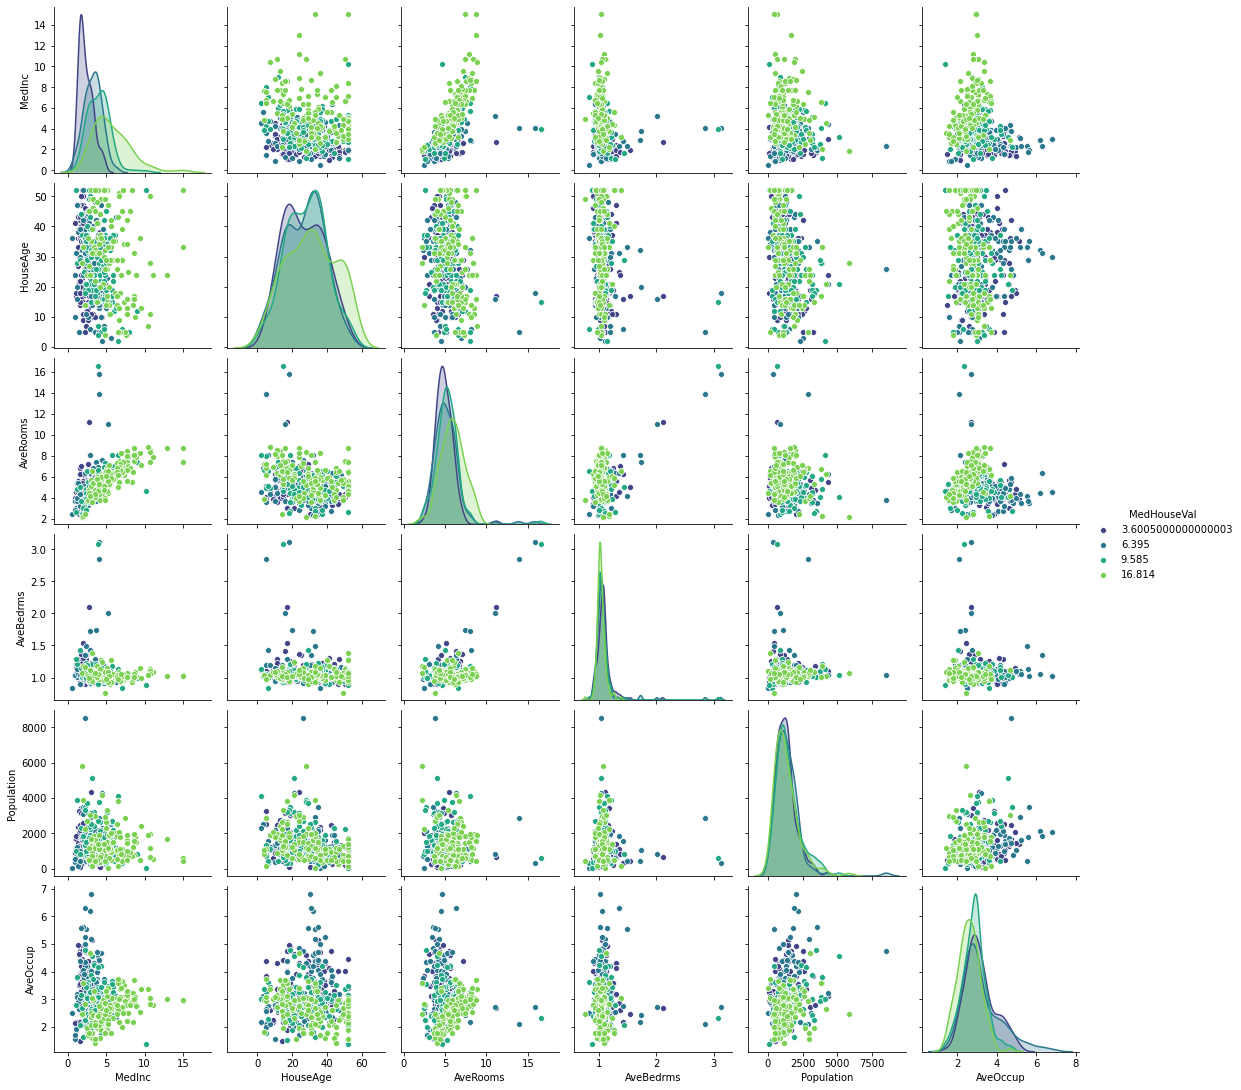

In [10]:
subset = dataset.iloc[indices].drop(columns={"Latitude","Longitude"},axis=1)
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 4, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

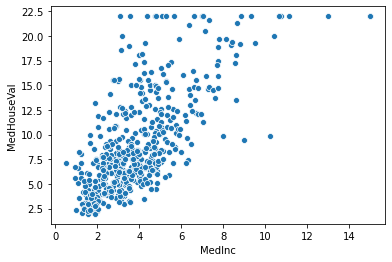

In [11]:
sns.scatterplot(data=dataset.iloc[indices], x="MedInc", y="MedHouseVal")

#### Observing a pattern in the median house prices based on Latitude and Longitude coordinates

Text(0.5, 1.0, 'Median house value according to\n their spatial location')

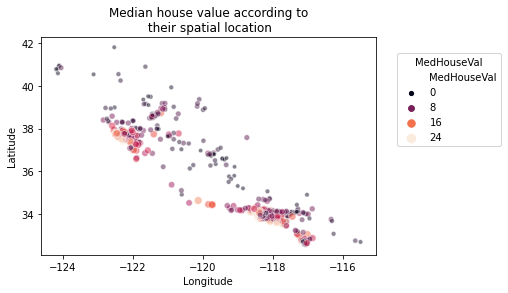

In [12]:
import seaborn as sns

sns.scatterplot(data=dataset.iloc[indices], x="Longitude", y="Latitude", size="MedHouseVal", hue="MedHouseVal", palette="rocket", alpha=0.5)

plt.legend(title="MedHouseVal",  loc="upper left", bbox_to_anchor=(1.05, 0.95))
plt.title("Median house value according to\n their spatial location")

With the help of scatterplot we can see that housing prices are related to the latitude and logitude (location) of the property. Here the color represents the price of the house.

In [13]:
#importing all libraries
from sklearn.linear_model import LogisticRegression,LinearRegression,RidgeCV,LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_error

In [14]:
# x for features, y for responses
x = dataset.drop("MedHouseVal",axis=1)
y = dataset["MedHouseVal"]

### Prediction with PCA

#### using Pipeline(scaler,PCA) to achieve desired results

In [15]:
scaler = Pipeline([("standard",StandardScaler()),("minmax",MinMaxScaler()),("robust",RobustScaler())])
scaled_pca = Pipeline([("scaler",scaler),("pca",PCA(n_components=4))])

# StandardScaler and PCA
print("\nStandardScaler => PCA")
ss = scaled_pca["scaler"]["standard"].fit_transform(x)
ss_pca = scaled_pca["pca"].fit_transform(ss)
print(ss_pca)
print("\nStandard normalized data\nMean:",np.mean(scaled_pca["scaler"]["standard"].fit_transform(x)),
      "\nStd Deviation:",np.std(scaled_pca["scaler"]["standard"].fit_transform(x)))
n_ss = np.argmax(np.cumsum(scaled_pca["pca"].explained_variance_ratio_)>0.9)+1
print("Number of dimensions:",n_ss)

# MinMaxScaler and PCA
print("\nMinMaxScaler => PCA")
mm = scaled_pca["scaler"]["minmax"].fit_transform(x)
mm_pca = scaled_pca["pca"].fit_transform(mm)
print(mm_pca)
print("\nMinMax normalized data\nMean:",np.mean(scaled_pca["scaler"]["minmax"].fit_transform(x)),
      "\nStd Deviation:",np.std(scaled_pca["scaler"]["minmax"].fit_transform(x)))
n_mm = np.argmax(np.cumsum(scaled_pca["pca"].explained_variance_ratio_)>0.9)+1
print("Number of dimensions:",n_mm)

# RobustScaler and PCA
print("\nRobustScaler => PCA")
rs = scaled_pca["scaler"]["robust"].fit_transform(x)
rs_pca = scaled_pca["pca"].fit_transform(rs)
print(rs_pca)
print("\nRobust normalized data\nMean:",np.mean(scaled_pca["scaler"]["robust"].fit_transform(x)),
      "\nStd Deviation:",np.std(scaled_pca["scaler"]["robust"].fit_transform(x)))
n_rs = np.argmax(np.cumsum(scaled_pca["pca"].explained_variance_ratio_)>0.9)+1
print("Number of dimensions:",n_rs)


StandardScaler => PCA
[[ 1.88156639 -0.50131313 -0.30660446 -2.56188611]
 [ 1.36971152 -0.11951467  1.9111278  -1.87465378]
 [ 2.08652146 -0.49774074 -0.93105157 -2.10801274]
 ...
 [ 1.40616941 -1.09166956  0.56409981  1.09301022]
 [ 1.54656169 -1.05451429  0.36277491  0.97059885]
 [ 1.40869551 -0.89207847  0.89442175  0.902663  ]]

Standard normalized data
Mean: -1.0874213518441465e-15 
Std Deviation: 1.0
Number of dimensions: 1

MinMaxScaler => PCA
[[ 0.37763551 -0.16466382  0.33341936  0.0207258 ]
 [ 0.31684242  0.22236611  0.30274267 -0.01321725]
 [ 0.40973557 -0.38262773  0.27719391  0.02277616]
 ...
 [ 0.37777913  0.28220378 -0.17813435  0.10109254]
 [ 0.38695491  0.26411902 -0.16402043  0.0976362 ]
 [ 0.36993383  0.3047418  -0.13208346  0.09990443]]

MinMax normalized data
Mean: 0.2094929477183191 
Std Deviation: 0.2513441710273951
Number of dimensions: 3

RobustScaler => PCA
[[-0.60756681 -0.50516976 -1.32583746  2.26230858]
 [-1.11358774 -1.18653916  1.04951811  2.07452402]
 

#### Choosing StandardScaler having lowest dimensions

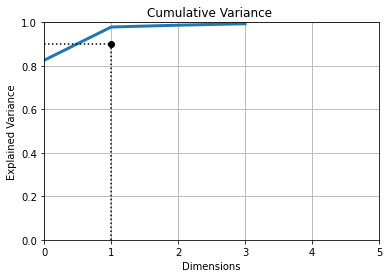

In [16]:
plt.figure(figsize=(6,4))
plt.title("Cumulative Variance ")
plt.plot(np.cumsum(scaled_pca["pca"].explained_variance_ratio_), linewidth=3)
plt.axis([0, 5, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([n_ss, n_ss], [0, 0.9], "k:")
plt.plot([0, n_ss], [0.9, 0.9], "k:")
plt.plot(n_ss, 0.9, "ko")
plt.grid(True)
plt.show()

#### Explanation of variance with n_dimensions = 1

In [17]:
variance = scaled_pca["pca"].explained_variance_ratio_
print("1st variable explains %.2f%% of the total variance, 2nd variable explains %.2f%%, 3rd variable %.2f%% and 4th variable %.2f%%"%(variance[0]*100,variance[1]*100,variance[2]*100,variance[3]*100))

rest = 1 - (variance[0]+variance[1]+variance[2]+variance[3])
print("%.2f%% of the variance is lost"%(rest*100))

1st variable explains 82.58% of the total variance, 2nd variable explains 15.27%, 3rd variable 0.84% and 4th variable 0.67%
0.64% of the variance is lost


In [18]:
# Split the data into training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(ss_pca,y,test_size=0.2,random_state = 42)

#splitting into train and validation sets
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


#### Let's try various regression techniques

In [19]:
bestscore = 0
alphas = 10**np.linspace(5,-2,10)
classifiers = [{"name":"Linear Regression", "model":LinearRegression()},
               {"name":"Lasso Regression", "model":LassoCV(alphas=alphas)},
               {"name":"Ridge Regression", "model":RidgeCV(alphas=alphas)},
               {"name":"Decision Tree Regression", "model":DecisionTreeRegressor(max_depth=3)},
               {"name":"Random Forest Regression", "model":RandomForestRegressor(max_depth=3)},
               {"name":"Gradient Boost Regressor", "model":GradientBoostingRegressor(max_depth=3)},
               {"name":"MLP Regression", "model":MLPRegressor(learning_rate_init=1.0,hidden_layer_sizes=(5,2),max_iter=2000)}]

for i in range(len(classifiers)):
    model = classifiers[i]["model"].fit(X_train,Y_train)
    cv_scores = cross_val_score(model,X_train,Y_train,cv=10)
    if np.mean(cv_scores) > bestscore:
        bestscore = np.mean(cv_scores)
        modelname = classifiers[i]["name"]
        bestmodel = classifiers[i]["model"].fit(X_train,Y_train)

#### Best model score and prediction with PCA: Gradient Boosting Regressor

With PCA
Best model Training R2 score: 57.85%
Best model Testing R2 score: 54.04%
Best RMSE score: 3.416375796732136
Best Average CV score: 0.55067499469056


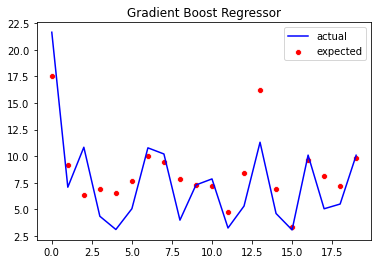

In [20]:
#R2 score and RMSE score of best model
preds = bestmodel.predict(X_test)
print("With PCA")
print("Best model Training R2 score: %.2f%%"%(bestmodel.score(X_train,Y_train)*100))
print("Best model Testing R2 score: %.2f%%"%(bestmodel.score(X_test,Y_test)*100))
print("Best RMSE score:",mean_squared_error(preds,Y_test)**0.5)
print("Best Average CV score:" , bestscore)

ax = range(len(preds[0:20]))
plt.plot(ax,Y_test[0:20],color="b",label="actual")
sns.scatterplot(ax,preds[0:20],color="r",label="expected")
plt.title(modelname)
plt.legend(loc="best")

### Prediction Without PCA

In [21]:
#splitting into train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#splitting into train and validation sets
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


#### Let's try various regression techniques

In [22]:
bestscore = 0
alphas = 10**np.linspace(5,-2,10)
classifiers = [{"name":"Linear Regression", "model":LinearRegression()},
               {"name":"Lasso Regression", "model":LassoCV(alphas=alphas)},
               {"name":"Ridge Regression", "model":RidgeCV(alphas=alphas)},
               {"name":"Decision Tree Regression", "model":DecisionTreeRegressor(max_depth=3)},
               {"name":"Random Forest Regression", "model":RandomForestRegressor(max_depth=3)},
               {"name":"Gradient Boost Regressor", "model":GradientBoostingRegressor(max_depth=3)},
               {"name":"MLP Regression", "model":MLPRegressor(learning_rate_init=1.0,hidden_layer_sizes=(5,2),max_iter=2000)}]

for i in range(len(classifiers)):
    model = classifiers[i]["model"].fit(X_train,Y_train)
    cv_scores = cross_val_score(model,X_train,Y_train,cv=10)
    if np.mean(cv_scores) > bestscore:
        bestscore = np.mean(cv_scores)
        modelname = classifiers[i]["name"]
        bestmodel = classifiers[i]["model"].fit(X_train,Y_train)

#### Best model score and prediction without PCA: Gradient Boosting Regressor

Best model Training R2 score: 80.84%
Best model Testing R2 score: 78.42%
Best RMSE score: 2.3408905340678245
Best Average CV score: 0.7843496413488087


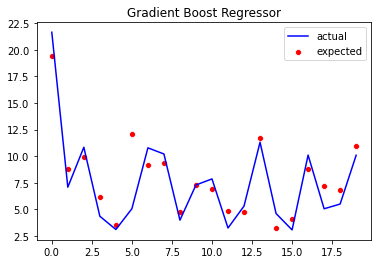

In [23]:
#R2 score and RMSE score of best model
preds = bestmodel.predict(X_test)
print("Best model Training R2 score: %.2f%%"%(bestmodel.score(X_train,Y_train)*100))
print("Best model Testing R2 score: %.2f%%"%(bestmodel.score(X_test,Y_test)*100))
print("Best RMSE score:",mean_squared_error(preds,Y_test)**0.5)
print("Best Average CV score:" , bestscore)

ax = range(len(preds[0:20]))
plt.plot(ax,Y_test[0:20],color="b",label="actual")
sns.scatterplot(ax,preds[0:20],color="r",label="expected")
plt.title(modelname)
plt.legend(loc="best")

In [24]:
print(X_train.shape,X_test.shape,X_val.shape)

(13206, 8) (4127, 8) (3302, 8)


#### Based on the findings above, we can determine the best model for achieving best results is without PCA
#### Thus it is possible to predict the housing prices with our Gradient Boosting regression model with 79% accuracy
#### The out-of-sample score can be calculated using a validation set from training set

Without PCA
Training R2 score: 80.84%
Validation R2 score: 78.10%
Validation RMSE score 2.36569182759097
Average CV score: 0.7856544192174608


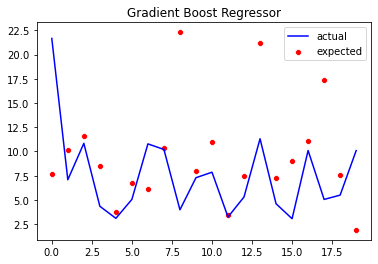

In [25]:
cv_score = 0

preds = bestmodel.predict(X_val)
print("Without PCA")
print("Training R2 score: {:.2f}%".format(bestmodel.score(X_train,Y_train)*100))
print("Validation R2 score: {:.2f}%".format(bestmodel.score(X_val,Y_val)*100))
print("Validation RMSE score",mean_squared_error(preds,Y_val)**0.5)

for n in range(2,6):
    k_params = KFold(n_splits=n)
    cv = cross_val_score(bestmodel,X_train,Y_train,cv=k_params)
    if np.mean(cv) > cv_score:
        cv_score = np.mean(cv) 
print("Average CV score:",cv_score)

ax = range(len(preds[0:20]))
plt.plot(ax,Y_test[0:20],color="b",label="actual")
sns.scatterplot(ax,preds[0:20],color="r",label="expected")
plt.title(modelname)
plt.legend(loc="best")

### Conclusions:
#### Our model can predict data for our out-of-sample set with a mean accuracy score of 79%
#### The dataset contains more outliers that caused the predictions to drop when removed
#### More records are necessary achieve higher mean accuracy and reduce variance
#### Dataset used was published in 1990 and has been adjusted to reflect some inflation. 

## Part C

Ramandeep 300346364 (25%): Python programming till EDA

Rodrick 300337330 (25%): Python programming after EDA

Samdeep 300329987 (25%): Report Writing

Omkar 300323873 (25%): Presentation